In [1]:
!pip install networkx matplotlib


  Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.2 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached matplotlib-3.10.7-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 4.3 MB/s eta 0:00:00 MB

In [2]:
import networkx as nx

G = nx.karate_club_graph()

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Average clustering coefficient:", nx.average_clustering(G))


Nodes: 34
Edges: 78
Average clustering coefficient: 0.5706384782076823


In [3]:
!gunzip wiki-Vote.txt.gz


In [4]:
import networkx as nx

G = nx.read_edgelist("wiki-Vote.txt", nodetype=int, comments='#')

print("Graph loaded!")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())


Graph loaded!
Nodes: 7115
Edges: 100762


In [5]:
avg_cluster = nx.average_clustering(G)
avg_cluster


0.1408978458930873

In [6]:
local_clustering = nx.clustering(G)
list(local_clustering.items())[:10]


[(30, 0.15079365079365079),
 (1412, 0.04926108374384237),
 (3352, 0.11341014393178656),
 (5254, 0.08517596871667259),
 (5543, 0.14312251473021217),
 (7478, 0.0957955088389871),
 (3, 0.2196078431372549),
 (28, 0.08767799506360358),
 (39, 0.18842805939580134),
 (54, 0.26161616161616164)]

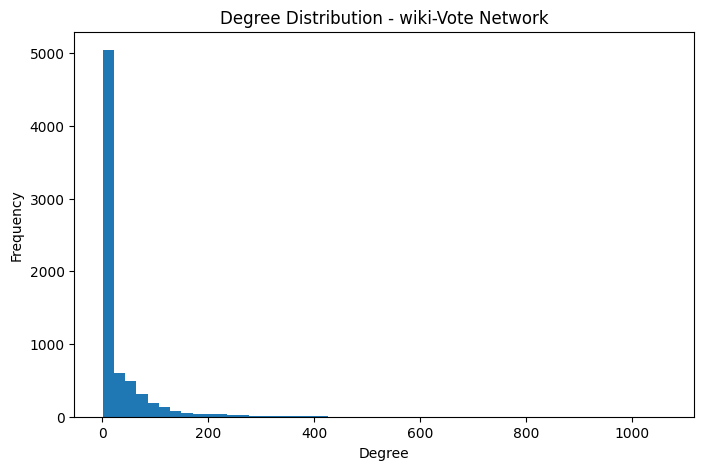

In [7]:
import matplotlib.pyplot as plt

degrees = [d for _, d in G.degree()]

plt.figure(figsize=(8,5))
plt.hist(degrees, bins=50)
plt.title("Degree Distribution - wiki-Vote Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()


In [11]:
!pip install python-igraph


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [13]:
import random
import numpy as np

sample_nodes = random.sample(list(Gcc.nodes()), 100)

lengths = []
for n in sample_nodes:
    sp = nx.single_source_shortest_path_length(Gcc, n)
    lengths.extend(sp.values())

approx_avg_path = np.mean(lengths)
approx_avg_path


np.float64(3.2644692895556187)

In [14]:
!pip install python-louvain

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9460 sha256=c6fa79aa269bbed6afdbf644338fd16cee90aa9e4d0483677707e8c81769870d
  Stored in directory: /Users/aaryansingh/Library/Caches/pip/wheels/ee/52/54/7ecd0f1ebf5f5a8466f70a27ed2b94d20b955376879d6159c5
Successfully built python-louvain

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
import community as community_louvain

partition = community_louvain.best_partition(G)
len(set(partition.values()))

30

In [16]:
deg_cent = nx.degree_centrality(G)
sorted(list(deg_cent.items()), key=lambda x: x[1], reverse=True)[:10]

[(2565, 0.1497048074219848),
 (766, 0.10865898228844531),
 (11, 0.10444194545965702),
 (1549, 0.10402024177677818),
 (457, 0.10289569862243464),
 (1166, 0.09671071127354512),
 (2688, 0.08687095867303908),
 (1374, 0.07492268765813888),
 (1151, 0.07267360134945178),
 (5524, 0.06958110767500703)]

In [17]:
bet_cent = nx.betweenness_centrality(G, k=100)  # sampling here to make this process faster
sorted(list(bet_cent.items()), key=lambda x: x[1], reverse=True)[:10]

[(2565, 0.07041413726439105),
 (457, 0.03406078465765416),
 (11, 0.03144366725585797),
 (1166, 0.02759965270774131),
 (1549, 0.027560340951885174),
 (766, 0.02111663262855348),
 (15, 0.020852563102010883),
 (72, 0.020664009930546613),
 (5022, 0.01870606956910127),
 (5524, 0.0182747681088265)]

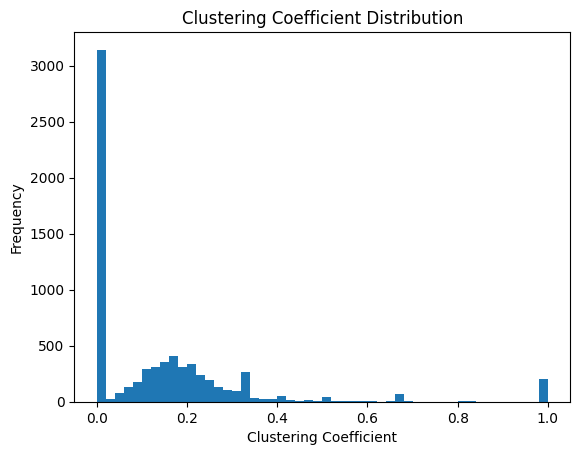

In [18]:
clustering_values = list(nx.clustering(G).values())

plt.hist(clustering_values, bins=50)
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

In [19]:
nx.density(G)

0.003981420144693063

In [20]:
nx.degree_assortativity_coefficient(G)

-0.08305248270016032

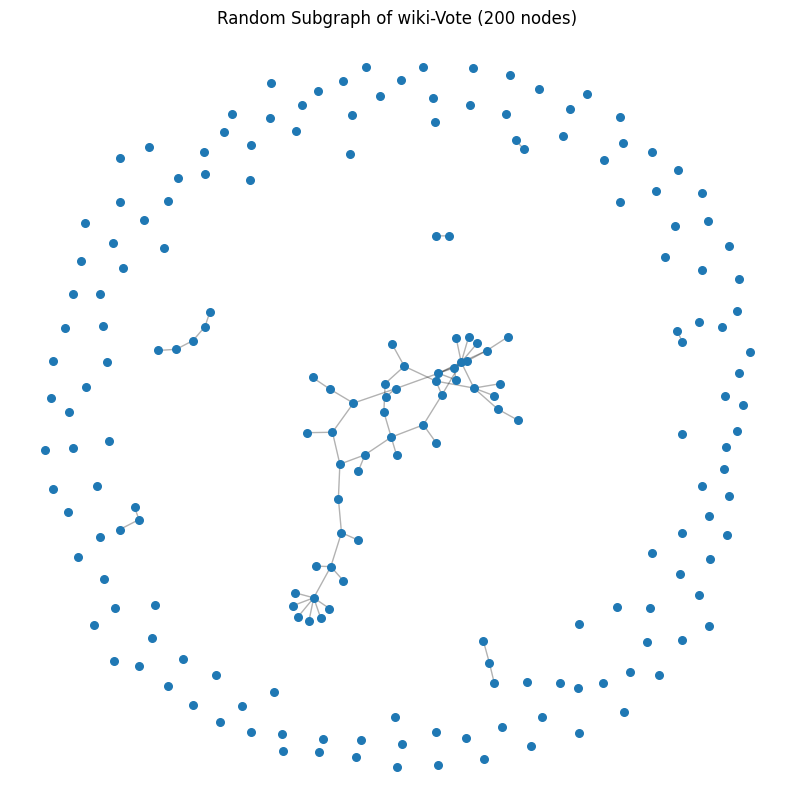

In [21]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Taking some sample nodes
sample_nodes = random.sample(list(G.nodes()), 200)
H = G.subgraph(sample_nodes).copy()

plt.figure(figsize=(10,10))
pos = nx.spring_layout(H, iterations=30)
nx.draw_networkx_nodes(H, pos, node_size=30)
nx.draw_networkx_edges(H, pos, alpha=0.3)
plt.title("Random Subgraph of wiki-Vote (200 nodes)")
plt.axis("off")
plt.show()

In [22]:
!pip install python-louvain
import community as community_louvain

partition = community_louvain.best_partition(G)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [23]:
from collections import Counter

community_sizes = Counter(partition.values())
largest_comm = community_sizes.most_common(1)[0][0]

largest_comm_nodes = [n for n in G.nodes() if partition[n] == largest_comm]

H = G.subgraph(largest_comm_nodes).copy()
len(H.nodes()), len(H.edges())

(2524, 24075)

In [25]:
!pip install scipy

  Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached scipy-1.16.3-cp313-cp313-macosx_14_0_arm64.whl (20.9 MB)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


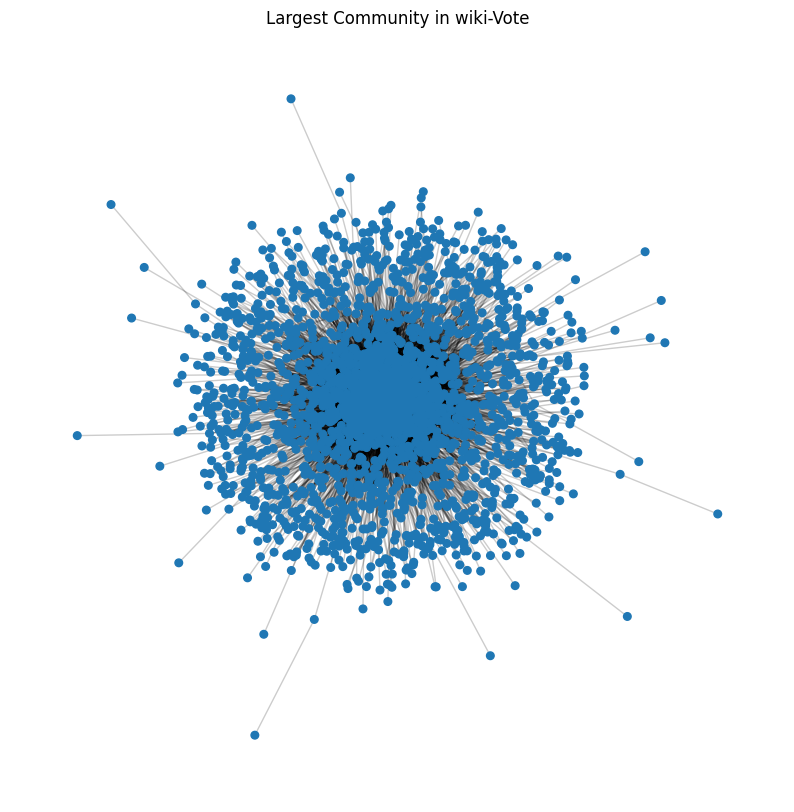

In [26]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(H, iterations=40)
nx.draw_networkx_nodes(H, pos, node_size=30, 
                       node_color=[partition[n] for n in H.nodes()], cmap="tab20")
nx.draw_networkx_edges(H, pos, alpha=0.2)
plt.title("Largest Community in wiki-Vote")
plt.axis("off")
plt.show()

In [27]:
nx.write_gexf(G, "wiki-vote.gexf")